### Acknowledgements : 
The data was scraped from Booking.com. All data in the file is publicly available to everyone already. Please be noted that data is originally owned by Booking.com.

### Data Context : 
This dataset contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe. Meanwhile, the geographical location of hotels are also provided for further analysis.

##### The csv file contains 17 fields and 515,000 records. The description of each field is as below:

Hotel_Address: Address of hotel./n  
Review_Date: Date when reviewer posted the corresponding review.  
Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
Hotel_Name: Name of Hotel  
Reviewer_Nationality: Nationality of Reviewer  
Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'  
ReviewTotalNegativeWordCounts: Total number of words in the negative review.  
Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'  
ReviewTotalPositiveWordCounts: Total number of words in the positive review.  
Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience  
TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.  
TotalNumberof_Reviews: Total number of valid reviews the hotel has.  
Tags: Tags reviewer gave the hotel.  
dayssincereview: Duration between the review date and scrape date.  
AdditionalNumberof_Scoring: There are also some guests who just made a - scoring on the service rather than a review. This number indicates how many valid scores without review in there.  
lat: Latitude of the hotel  
lng: longtitude of the hotel

### Importing Data & Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_reviews.csv')

## DATA EXPLORATION

In [3]:
df.shape #Checking data size

(515738, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   address                                     515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_Score_hotel                         515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   total_word_counts_negative_review           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [5]:
df.describe()

,Additional_Number_of_Scoring,average_Score_hotel,total_word_counts_negative_review,total_number_of_reviews,total_word_counts_positive_review,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [6]:
df.head(5)

,address,Additional_Number_of_Scoring,review_date,average_Score_hotel,hotel_name,reviewer_nationality,negative_review,total_word_counts_negative_review,total_number_of_reviews,positive_review,total_word_counts_positive_review,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [7]:
df.columns
#df.head()

Index(['address', 'Additional_Number_of_Scoring', 'review_date',
       'average_Score_hotel', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'total_word_counts_negative_review',
       'total_number_of_reviews', 'positive_review',
       'total_word_counts_positive_review',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [8]:
df.isna().sum()

address                                          0
Additional_Number_of_Scoring                     0
review_date                                      0
average_Score_hotel                              0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
total_word_counts_negative_review                0
total_number_of_reviews                          0
positive_review                                  0
total_word_counts_positive_review                0
total_number_of_reviews_reviewer_has_given       0
reviewer_score                                   0
tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [9]:
df.duplicated().sum()

526

In [10]:
df['address'].value_counts()

address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: count, Length: 1493, dtype: i

In [11]:
df['reviewer_nationality'].value_counts()

reviewer_nationality
 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: count, Length: 227, dtype: int64

In [12]:
df['tags'].value_counts()

tags
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                  5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                 3291
                                                                                                                                         ... 
[' Leisure trip ', ' Family with older children ', ' Suite Family Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']          1
[

In [13]:
df.columns

Index(['address', 'Additional_Number_of_Scoring', 'review_date',
       'average_Score_hotel', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'total_word_counts_negative_review',
       'total_number_of_reviews', 'positive_review',
       'total_word_counts_positive_review',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [14]:
df["hotel_name"].nunique()

1492

### Observation after data exploring
#### Missing data :  
We have a 3268 missing values just in Latitude & Longitude.
#### Duplicated data
We will delete duplicate values, 526 records
#### Feature engineering
1. 'Additional_Number_of_Scoring', 'total_word_counts_negative_review', 'total_word_counts_positive_review', 'days_since_review'columns we will deleted since it isn't indicating anything useful for the project
2. We will create a feature named Country from hotel address column.
3. Have to create a feature named all reviews to append both positive and negetive reviews 
4. We have more than 200 country in Reviewer_Nationality columns.
5. Rename all colums to standardize the feature names 


## DATA PREPROCESSING

In [15]:
df.drop_duplicates(inplace=True,ignore_index=True)
#handling duplicates

In [16]:
df=df.drop(columns=[ 'Additional_Number_of_Scoring', 'total_word_counts_negative_review',
       'total_word_counts_positive_review','days_since_review'])

In [17]:
df["All_Review"] = df["positive_review"] + " " + df["negative_review"]

In [18]:
def get_contries():
    df['country'] = df.address.apply(lambda x: str(x).split(" ")[-1])
    df['country'] = df['country'].str.replace('Kingdom','United Kingdom')
get_contries()

In [19]:
df.columns

Index(['address', 'review_date', 'average_Score_hotel', 'hotel_name',
       'reviewer_nationality', 'negative_review', 'total_number_of_reviews',
       'positive_review', 'total_number_of_reviews_reviewer_has_given',
       'reviewer_score', 'tags', 'lat', 'lng', 'All_Review', 'country'],
      dtype='object')

In [20]:
df=df[['hotel_name' , 'address' , 'country' , 'average_Score_hotel' , 'total_number_of_reviews' ,'reviewer_score' , 
    'All_Review' , 'positive_review' , 'negative_review' , 'review_date', 'reviewer_nationality', 
    'total_number_of_reviews_reviewer_has_given' , 'tags' , 'lat' , 'lng']]
df.head()

,hotel_name,address,country,average_Score_hotel,total_number_of_reviews,reviewer_score,All_Review,positive_review,negative_review,review_date,reviewer_nationality,total_number_of_reviews_reviewer_has_given,tags,lat,lng
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,2.9,Only the park outside of the hotel was beauti...,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,08-03-2017,Russia,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,7.5,No real complaints the hotel was great great ...,No real complaints the hotel was great great ...,No Negative,08-03-2017,Ireland,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,7.1,Location was good and staff were ok It is cut...,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7/31/2017,Australia,9,"[' Leisure trip ', ' Family with young childre...",52.360576,4.915968
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,3.8,Great location in nice surroundings the bar a...,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7/31/2017,United Kingdom,1,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",52.360576,4.915968
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,6.7,Amazing location and building Romantic settin...,Amazing location and building Romantic setting,You When I booked with your company on line y...,7/24/2017,New Zealand,3,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",52.360576,4.915968


In [21]:
df.to_csv("clean_data.csv",index=False)

In [22]:
df = df.rename(columns={'hotel_name':'Hotel_Name' ,'country': 'Country', 'address':'Address','average_Score_hotel':'Avg_Score_Hotel',
                        'total_number_of_reviews':'Total_No_Of_Reviews','reviewer_score':'Reviewer_Score',
                        'positive_review':'Positive_Review','negative_review':'Negative_Review','review_date':'Review_Date'
                        ,'reviewer_nationality':'Reviewer_Nationality','total_number_of_reviews_reviewer_has_given':
                        'Total_Number_Of_Reviews_Reviewer_Has_Given','tags':'Tags','lat':'Latitude','lng':'Longtitude'})

In [23]:
df.columns

Index(['Hotel_Name', 'Address', 'Country', 'Avg_Score_Hotel',
       'Total_No_Of_Reviews', 'Reviewer_Score', 'All_Review',
       'Positive_Review', 'Negative_Review', 'Review_Date',
       'Reviewer_Nationality', 'Total_Number_Of_Reviews_Reviewer_Has_Given',
       'Tags', 'Latitude', 'Longtitude'],
      dtype='object')

## DATA ANALYSIS

In [24]:
#df['Country'].unique()
#df['Country'].value_counts()
#df.Country.value_counts().plot.barh(color = 'orange')

In [25]:
df["Country"].value_counts()

Country
United Kingdom    262298
Spain              60149
France             59413
Netherlands        57211
Austria            38937
Italy              37204
Name: count, dtype: int64

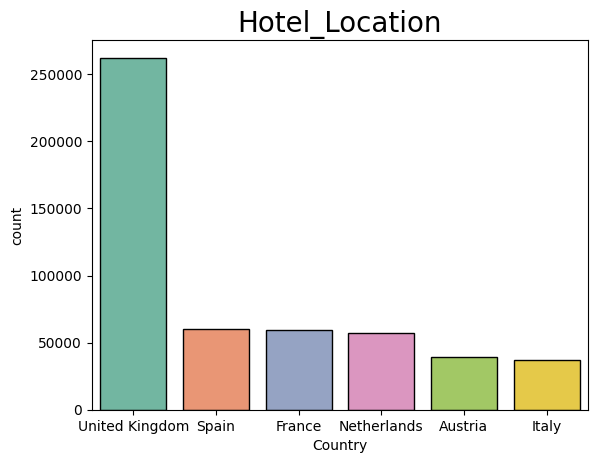

In [26]:
custom_palette = sns.color_palette("Set2", len(df['Country'].unique()))
sns.countplot(x = 'Country', data=df, order=df['Country'].value_counts().index,edgecolor="black",palette=custom_palette)
plt.title('Hotel_Location', fontsize=20)
plt.show()

**Country with reviews score**

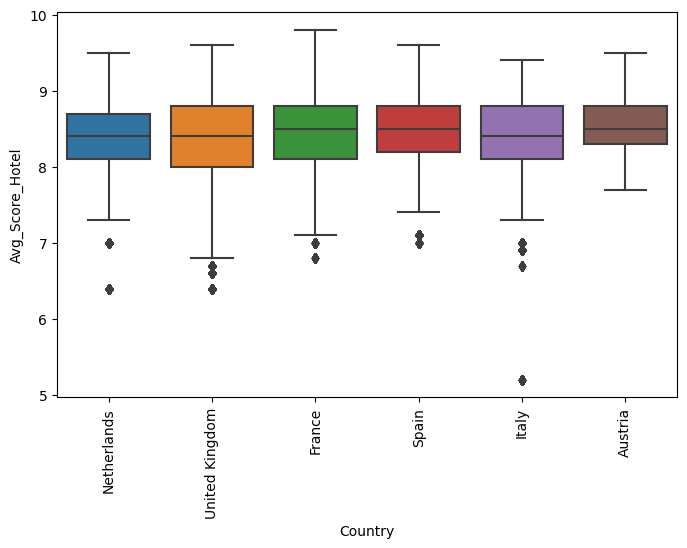

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Country'],y=df["Avg_Score_Hotel"])
plt.xticks(rotation=90);

**Best and Worst Hotels wrt Reviewer Score**

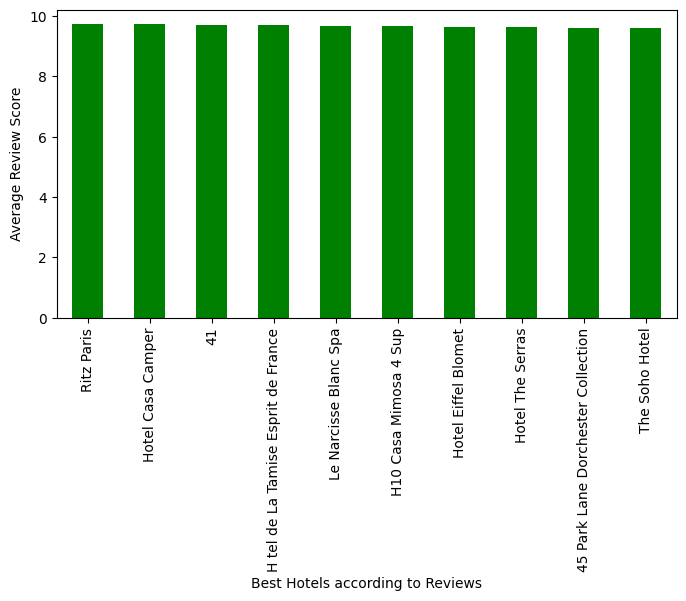

In [28]:
plt.figure(figsize=(8, 4))
best_hotels = df.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(10)
best_hotels.plot(kind="bar",color = "Green")
plt.xlabel('Best Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.show()

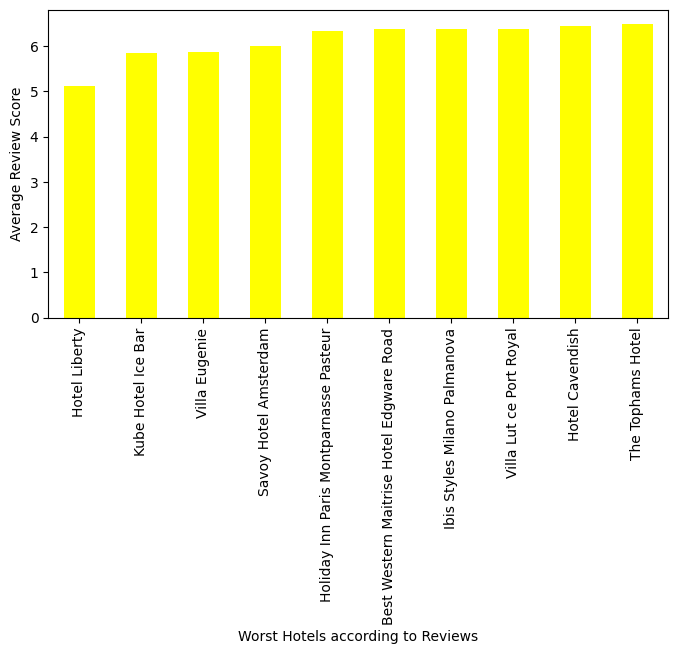

In [29]:
plt.figure(figsize=(8, 4))
worst_hotels =df.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(10)
worst_hotels.plot(kind="bar",color="Yellow")
plt.xlabel('Worst Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.show()

In [30]:
df[df.Avg_Score_Hotel >= 8.8][['Hotel_Name','Avg_Score_Hotel',
                               'Total_Number_Of_Reviews_Reviewer_Has_Given']].sort_values(by =
                                'Total_Number_Of_Reviews_Reviewer_Has_Given',ascending = False)[:10]

,Hotel_Name,Avg_Score_Hotel,Total_Number_Of_Reviews_Reviewer_Has_Given
419053,art otel Amsterdam,9.0,281
107254,Montcalm Royal London House City of London,9.2,281
398634,Hotel The Serras,9.6,237
20699,The Nadler Victoria,9.3,224
63426,Hotel Xenia Autograph Collection,9.0,224
405653,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,219
418641,art otel Amsterdam,9.0,219
386072,INK Hotel Amsterdam MGallery by Sofitel,8.9,219
323182,Hotel Okura Amsterdam,8.9,219
412222,Hotel DO Pla a Reial G L,9.3,199


Code filters a DataFrame to include only hotels with an average score of 8.8 or higher, sorts the filtered data by the number of reviews in descending order and retrieves the top 10 rows of the sorted data, giving you a list of the top-rated hotels with the most reviews.

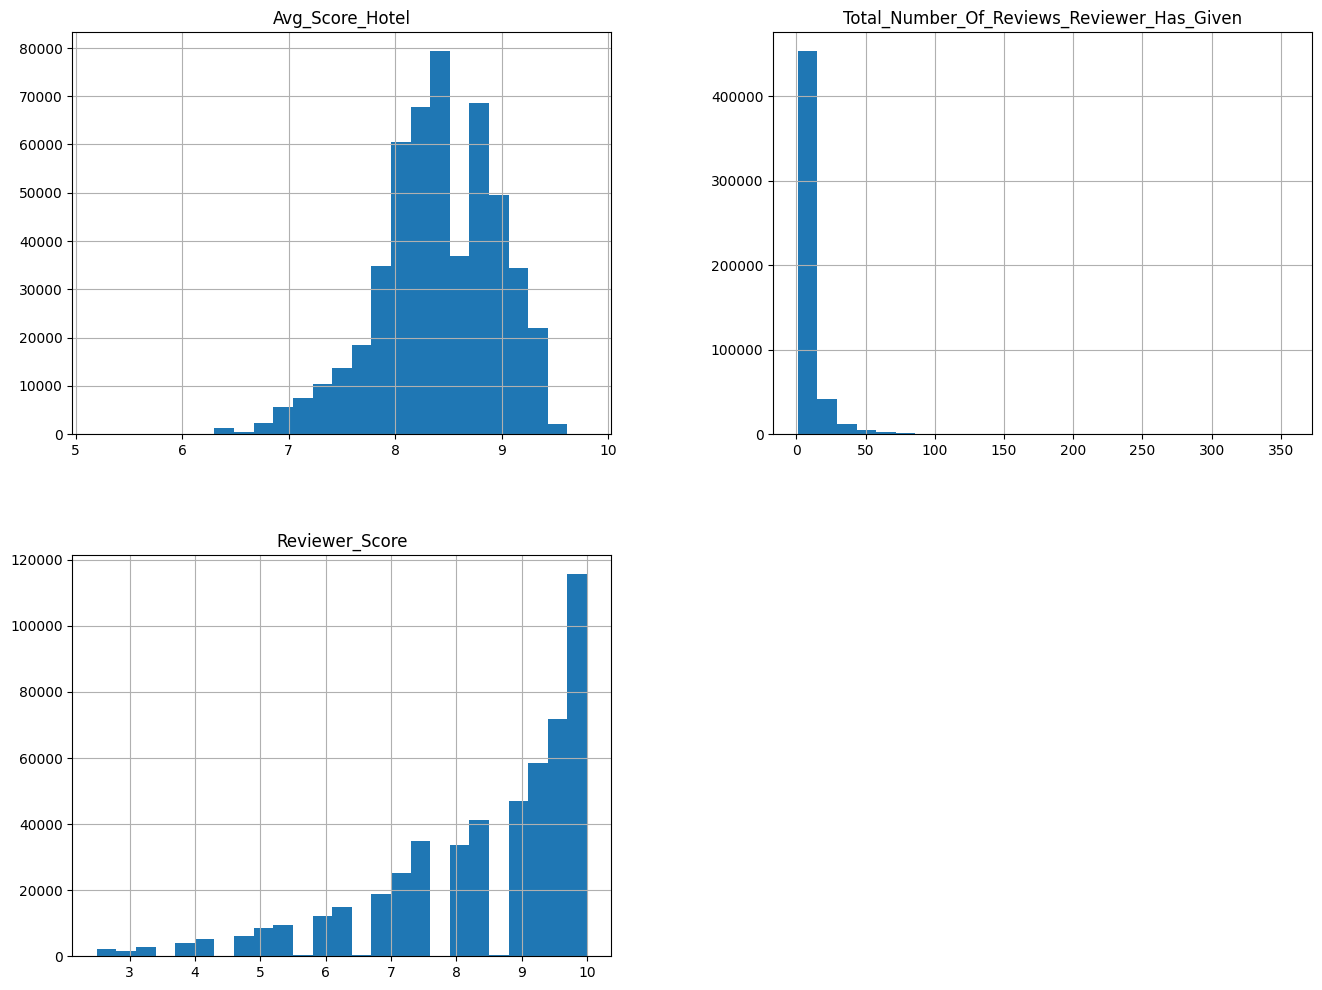

In [31]:
#df_uni = df[['Hotel_Name','Avg_Score_Hotel']]
#plt.figure(figsize = (14,6))
#sns.countplot(x = 'Avg_Score_Hotel',data = df_uni)
df[['Avg_Score_Hotel','Total_Number_Of_Reviews_Reviewer_Has_Given',
    'Reviewer_Score']].hist(bins=25,figsize=(16,12))
plt.show()

In [32]:
df.Avg_Score_Hotel.describe()

count    515212.000000
mean          8.397767
std           0.547952
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Avg_Score_Hotel, dtype: float64

*From the upper image and the table, it's quite evident that the majority of reviews fall to the right of 8.1. When a hotel's average score is below 8.1, it implies that it underperform than its 75% of its competitors.*

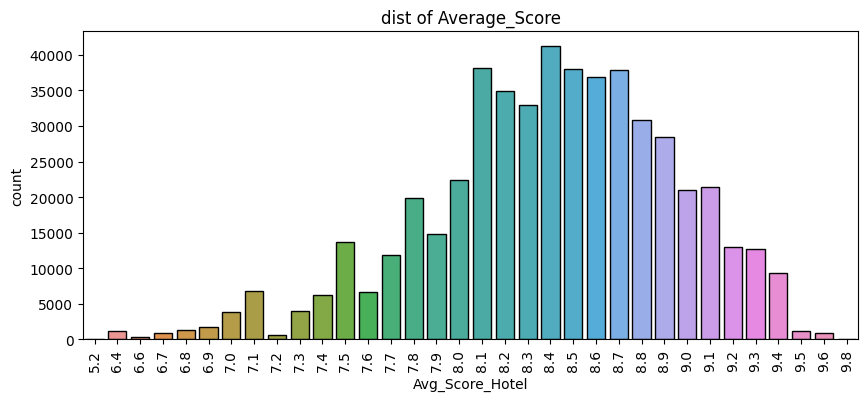

In [33]:
plt.figure(figsize=(10,4))
sns.countplot()
sns.countplot(x=df.Avg_Score_Hotel,edgecolor="black")
plt.title("dist of Average_Score")
plt.xticks(rotation=90);

### Unique hotels per country

In [34]:
Unique_Hotel_per_Country = df.groupby('Country')[['Hotel_Name']].nunique().sort_values(by='Hotel_Name').reset_index()
Unique_Hotel_per_Country

,Country,Hotel_Name
0,Netherlands,105
1,Austria,158
2,Italy,162
3,Spain,211
4,United Kingdom,400
5,France,458


<BarContainer object of 6 artists>

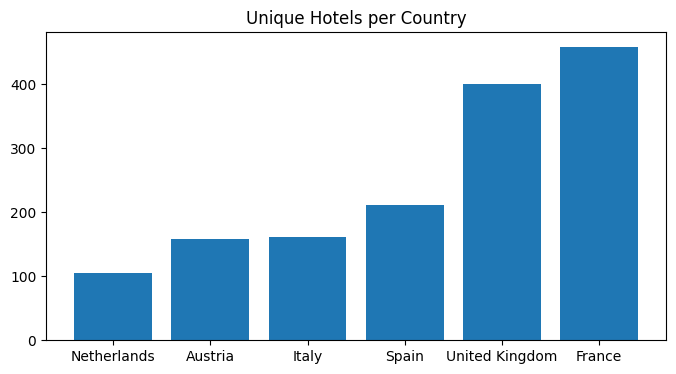

In [35]:
plt.figure(figsize=(8,4))
plt.title('Unique Hotels per Country')
plt.bar('Country', 'Hotel_Name', data=Unique_Hotel_per_Country)

<Axes: >

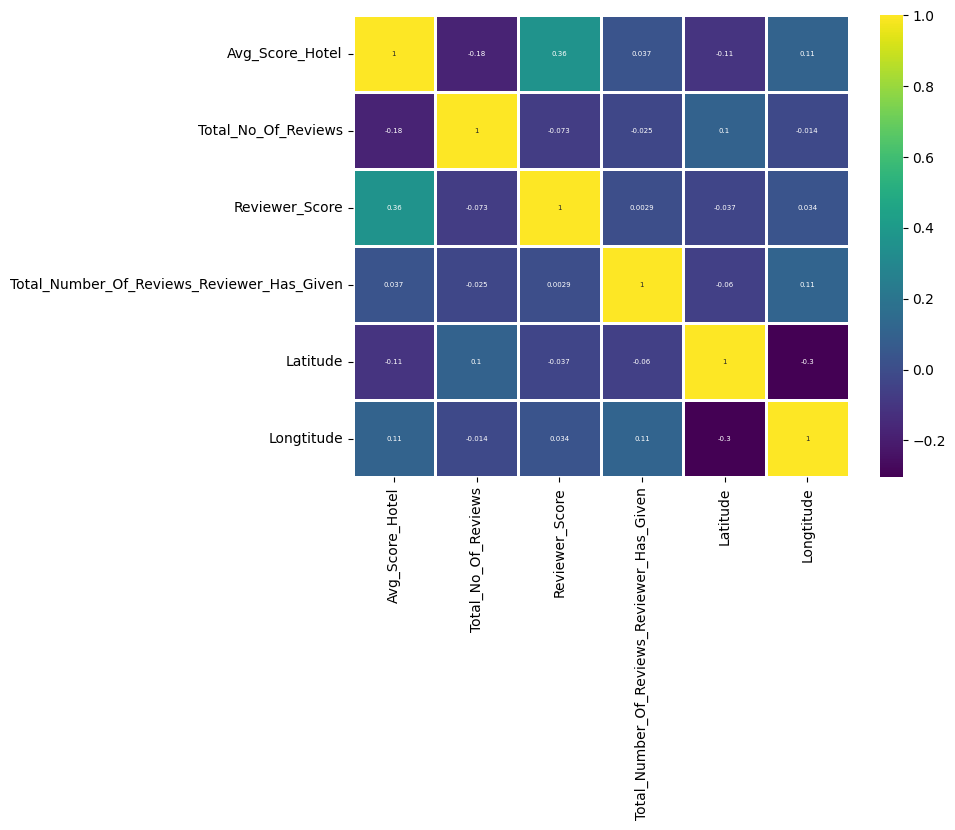

In [36]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='viridis', linewidth=1, annot=True, annot_kws={"size": 5})

This heatmap visually represents the correlation between numeric columns in the DataFrame. The colors indicates the strength and direction of the correlation, with warmer colors (closer to yellow) indicating positive correlation and cooler colors (closer to blue) indicating negative correlation.

In [37]:
from wordcloud import WordCloud

In [38]:
text_data1 = " ".join(df[df["Reviewer_Score"] >= 8]["Positive_Review"])
text_data2 = " ".join(df[df["Reviewer_Score"] <= 4]["Negative_Review"])

In [39]:
wordcloud1 = WordCloud(width=800, height=400, background_color="white").generate(text_data1)
wordcloud2 = WordCloud(width=800, height=400, background_color="white").generate(text_data2)

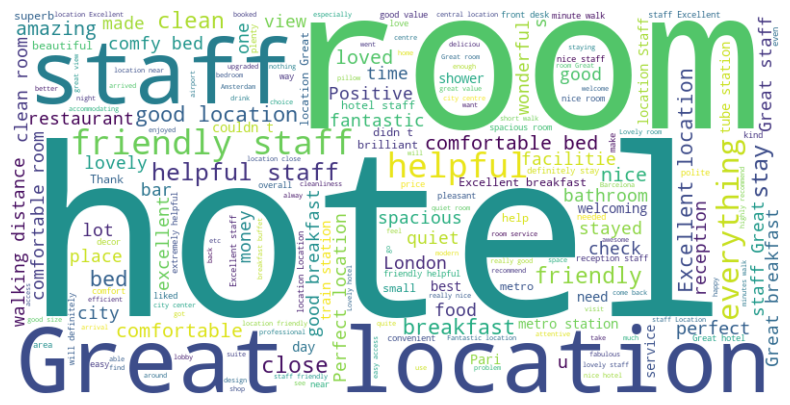

In [40]:
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud of all positive reviews which have reviewer score > 8

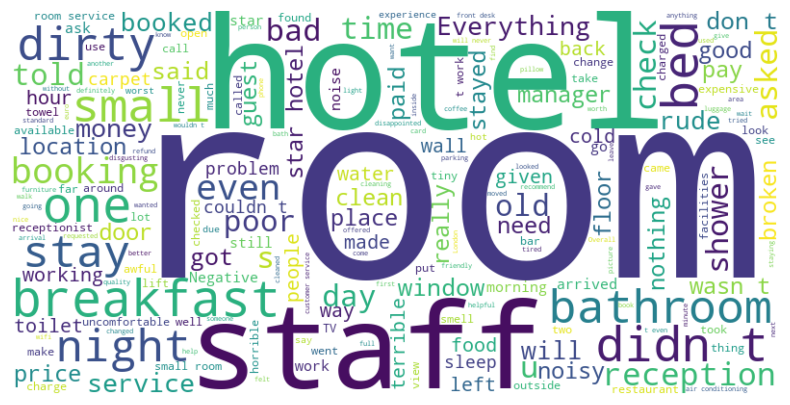

In [41]:
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

WordCloud of all negetive reviews which have reviewer score < 4

# NLP for reviews, SENTIMENT ANALYSIS

**CLEAN REVIEWS**
  
    1. Convert text to lowercase      
    2. Remove stopwords     
    3. Apply lemmatizaion

In [42]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk import ngrams


#nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))
wordnet_lemmatizer = WordNetLemmatizer()
#nltk.download('wordnet')

Checking if length of Negative_Review or Positives make sense or either different to other

In [43]:
df["Negative_Review"].str.len().value_counts(ascending=False)

Negative_Review
11      130256
8        17686
9         6751
20        3919
24        3852
         ...  
1519         1
1882         1
1597         1
1574         1
1641         1
Name: count, Length: 1787, dtype: int64

In [44]:
df["Positive_Review"].str.len().value_counts(ascending=False)

Positive_Review
11      40540
9       12726
15       5867
19       5731
20       5106
        ...  
1052        1
1246        1
1826        1
1437        1
1106        1
Name: count, Length: 1462, dtype: int64

In [45]:
def lemm(review):
    words = review.split()
    return ' '.join([wordnet_lemmatizer.lemmatize(word).lower() for word in words])

In [46]:
st_for_wc=["positive","no negative","nothing","none","everything","n a","n","na","not much",'no',"object", "dtype",
           "Positive_Review","Negative_Review","Wa","negative","was","negative"]
stop_words_all=list(stop_words)+st_for_wc
def remove_stop_words(review):
    words = review.split()
    
    return ' '.join([word for word in words if word not in stop_words])

In [47]:
def clean_data(data):
    #df['Negative_Review_clean'] = df['Negative_Review'].str.lower().str.strip()
    df['Negative_Review_clean'] = df['Negative_Review'].apply(remove_stop_words)
    df['Negative_Review_clean'] = df['Negative_Review'].apply(lemm)
    
    #df['Positive_Review_clean'] = df['Positive_Review'].str.lower().str.strip()
    df['Positive_Review_clean'] = df['Positive_Review'].apply(remove_stop_words)
    df['Positive_Review_clean'] = df['Positive_Review'].apply(lemm)
    
    
    return data

In [48]:
df= clean_data(df)


In [49]:
df.head(5)

,Hotel_Name,Address,Country,Avg_Score_Hotel,Total_No_Of_Reviews,Reviewer_Score,All_Review,Positive_Review,Negative_Review,Review_Date,Reviewer_Nationality,Total_Number_Of_Reviews_Reviewer_Has_Given,Tags,Latitude,Longtitude,Negative_Review_clean,Positive_Review_clean
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,2.9,Only the park outside of the hotel was beauti...,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,08-03-2017,Russia,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,i am so angry that i made this post available ...,only the park outside of the hotel wa beautiful
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,7.5,No real complaints the hotel was great great ...,No real complaints the hotel was great great ...,No Negative,08-03-2017,Ireland,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,no negative,no real complaint the hotel wa great great loc...
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,7.1,Location was good and staff were ok It is cut...,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7/31/2017,Australia,9,"[' Leisure trip ', ' Family with young childre...",52.360576,4.915968,rooms are nice but for elderly a bit difficult...,location wa good and staff were ok it is cute ...
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,3.8,Great location in nice surroundings the bar a...,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7/31/2017,United Kingdom,1,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",52.360576,4.915968,my room wa dirty and i wa afraid to walk baref...,great location in nice surroundings the bar an...
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,7.7,1403,6.7,Amazing location and building Romantic settin...,Amazing location and building Romantic setting,You When I booked with your company on line y...,7/24/2017,New Zealand,3,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",52.360576,4.915968,you when i booked with your company on line yo...,amazing location and building romantic setting


In [50]:
all_neg_words=df['Negative_Review_clean'].values
all_pos_words=df["Positive_Review_clean"].values
#all_pos_words

*Finding unigrams*

In [51]:
# displaying the frequency of words in positive and negative reviews 
freq_pos = Counter(all_pos_words)
freq_neg = Counter(all_neg_words)
print('Most common positive words : ',freq_pos.most_common(50))
print("*"*150)
print(" "*150)
print('Most common negative words : ',freq_neg.most_common(50))

Most common positive words :  [('no positive', 35904), ('location', 11931), ('everything', 3314), ('nothing', 1728), ('great location', 1687), ('the location', 1602), ('good location', 1497), ('breakfast', 797), ('friendly staff', 739), ('excellent location', 640), ('staff', 553), ('location and staff', 452), ('location staff', 436), ('comfy bed', 379), ('location location location', 345), ('location wa great', 325), ('good breakfast', 316), ('everything wa perfect', 313), ('location wa good', 312), ('perfect location', 287), ('the staff', 282), ('location is great', 278), ('comfortable bed', 267), ('every thing', 263), ('location is good', 257), ('all', 250), ('clean', 237), ('very friendly staff', 237), ('great breakfast', 228), ('excellent breakfast', 221), ('breakfast wa good', 219), ('location wa excellent', 205), ('very good location', 199), ('cleanliness', 193), ('location breakfast', 187), ('', 182), ('location is perfect', 175), ('helpful staff', 174), ('great location friendl

*Finding bigrams*

In [52]:
# two words that appear together
garms_positive=ngrams(all_pos_words,2)
garms_negative=ngrams(all_neg_words,2)

In [53]:
freq_pos_garms_positive = Counter(garms_positive)
freq_neg_garms_negative = Counter(garms_negative)
print('Most Common Two words [Positive]  : ',freq_pos_garms_positive.most_common(50))
print("*"*150)
print(" "*150)
print('Most Common Two words [Negative]  : ',freq_neg_garms_negative.most_common(50))

Most Common Two words [Positive]  :  [(('no positive', 'no positive'), 3283), (('no positive', 'location'), 1110), (('location', 'no positive'), 1063), (('location', 'location'), 520), (('no positive', 'everything'), 289), (('everything', 'no positive'), 272), (('nothing', 'no positive'), 183), (('no positive', 'nothing'), 180), (('no positive', 'great location'), 165), (('good location', 'no positive'), 154), (('great location', 'no positive'), 149), (('no positive', 'the location'), 143), (('no positive', 'good location'), 128), (('the location', 'no positive'), 118), (('location', 'everything'), 93), (('breakfast', 'no positive'), 90), (('everything', 'location'), 77), (('location', 'great location'), 77), (('location', 'the location'), 77), (('no positive', 'friendly staff'), 75), (('the location', 'location'), 75), (('great location', 'location'), 75), (('no positive', 'breakfast'), 74), (('friendly staff', 'no positive'), 72), (('location', 'good location'), 67), (('location', 'n

In [54]:
#Finding most important words in Negative Reviews 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 50,ngram_range=(4,4))
most_negative_words = cv.fit_transform(all_neg_words)
neg_counts = most_negative_words.sum(axis=0)
neg_counts = cv.vocabulary_
print('The most important words in Negative Reviews:')
print('--------------------------------------------')
print(neg_counts)

The most important words in Negative Reviews:
--------------------------------------------
{'hotel wa fully booked': 19, 'tea coffee facility room': 43, 'room wa small bathroom': 35, 'didn work room wa': 15, 'air conditioning wa working': 4, 'room wa little small': 32, 'wa hot air conditioning': 47, 'room wa hot air': 30, 'room little bit small': 21, 'room wa really small': 34, 'room wa quite small': 33, 'breakfast wa included price': 11, 'room wa smaller expected': 40, 'room wa bit cold': 25, 'room wa small wa': 39, 'room wa extremely small': 27, 'room wa bit small': 26, 'tea coffee making facility': 44, 'bed wa little hard': 6, 'room wa little bit': 31, 'thing didn like wa': 46, 'room wa ground floor': 29, 'room room wa small': 22, 'bed wa single bed': 7, 'room wa small people': 37, 'double room wa small': 17, 'room wa small price': 38, 'size room wa small': 42, 'room wa small bed': 36, 'air conditioning did work': 0, 'air conditioning wa noisy': 3, 'air conditioning didn work': 1, '

In [55]:
negative_words=pd.DataFrame()
negative_words["negative_sentence"]=neg_counts.keys()
negative_words["frequency"]=neg_counts.values()
negative_words.sort_values(by="frequency",ascending=False).head()

,negative_sentence,frequency
43,wa small bed wa,49
44,wa little bit small,48
6,wa hot air conditioning,47
20,thing didn like wa,46
37,tea making facility room,45


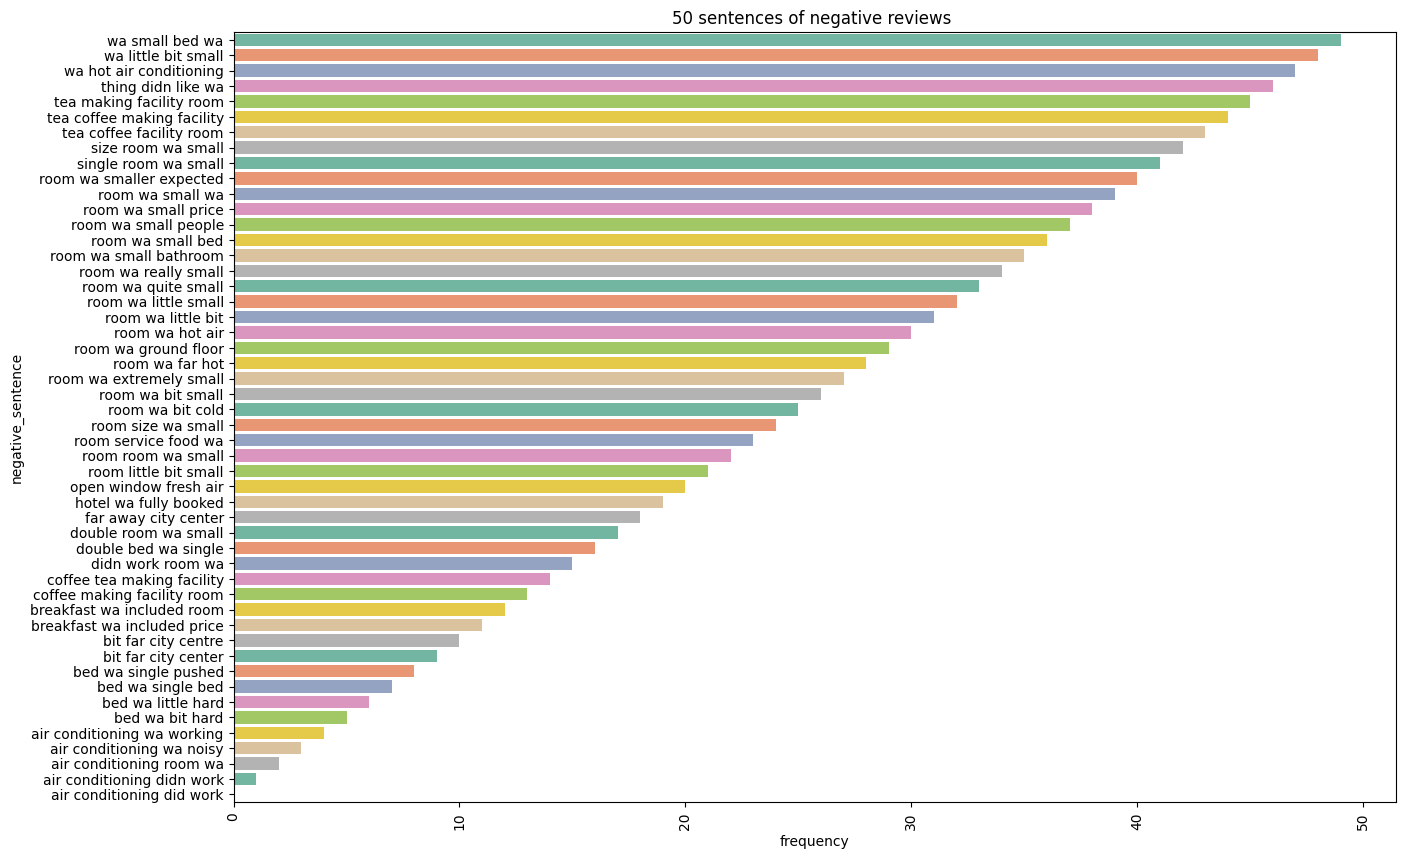

In [56]:
plt.figure(figsize=(15,10))
color_palette = sns.color_palette("Set2")
sns.barplot(x="frequency",y="negative_sentence",data=negative_words.sort_values(by="frequency",ascending=False),palette=color_palette)
plt.title("50 sentences of negative reviews ")
plt.xticks(rotation=90)
plt.show()

### Observations [ from negative_reviews] :

- These are the observations that would help hotels to improve their quality and service.
- These are the services or aspects that did not meet the satisfaction of the customers.

1. The provision and preparation of coffee and tea in-room hold significance.
2. It appears that a considerable number of rooms are compact, including both the bed and bathroom. A more spacious room is desirable.
3. There appear to be issues with the air conditioning, either due to its malfunction or excessive noise.
4. The distance between the hotel and the city center is a concern.
5. Problems with the availability of ironing boards have been noted.
6. Concerns have been raised regarding breakfast pricing.
7. Room availability tends to be limited due to high demand.
8. Many customers express a preference for rooms on higher floors, rather than the ground floor.

In [57]:
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 50,ngram_range=(4,4))
most_positive_words = cv.fit_transform(all_pos_words)
pos_counts = most_positive_words.sum(axis=0)
pos_counts = cv.vocabulary_
print('the most important words in Positive Reviews:')
print('--------------------------------------------')
print(pos_counts)

the most important words in Positive Reviews:
--------------------------------------------
{'bed wa really comfortable': 4, 'staff wa helpful friendly': 47, 'bed wa comfortable room': 0, 'wa comfortable room wa': 48, 'room wa spacious comfortable': 38, 'staff friendly helpful room': 43, 'friendly helpful room wa': 11, 'bed wa really comfy': 5, 'staff wa friendly helpful': 46, 'bed wa super comfy': 6, 'room wa clean comfortable': 33, 'friendly staff great location': 17, 'bed wa comfortable staff': 1, 'wa great room wa': 49, 'helpful room wa clean': 23, 'friendly staff good location': 16, 'breakfast wa good staff': 7, 'breakfast wa really good': 8, 'great location friendly staff': 20, 'room wa spacious clean': 37, 'room wa clean bed': 32, 'great location walking distance': 22, 'staff friendly helpful breakfast': 41, 'friendly staff good breakfast': 15, 'staff friendly room wa': 44, 'room wa good size': 35, 'great location friendly helpful': 19, 'location friendly helpful staff': 27, 'fri

In [58]:
positive_words=pd.DataFrame()
positive_words["positive_sentence"]=pos_counts.keys()
positive_words["frequency"]=pos_counts.values()
positive_words.sort_values(by="frequency",ascending=False).head()

,positive_sentence,frequency
13,wa great room wa,49
3,wa comfortable room wa,48
1,staff wa helpful friendly,47
8,staff wa friendly helpful,46
43,staff really friendly helpful,45


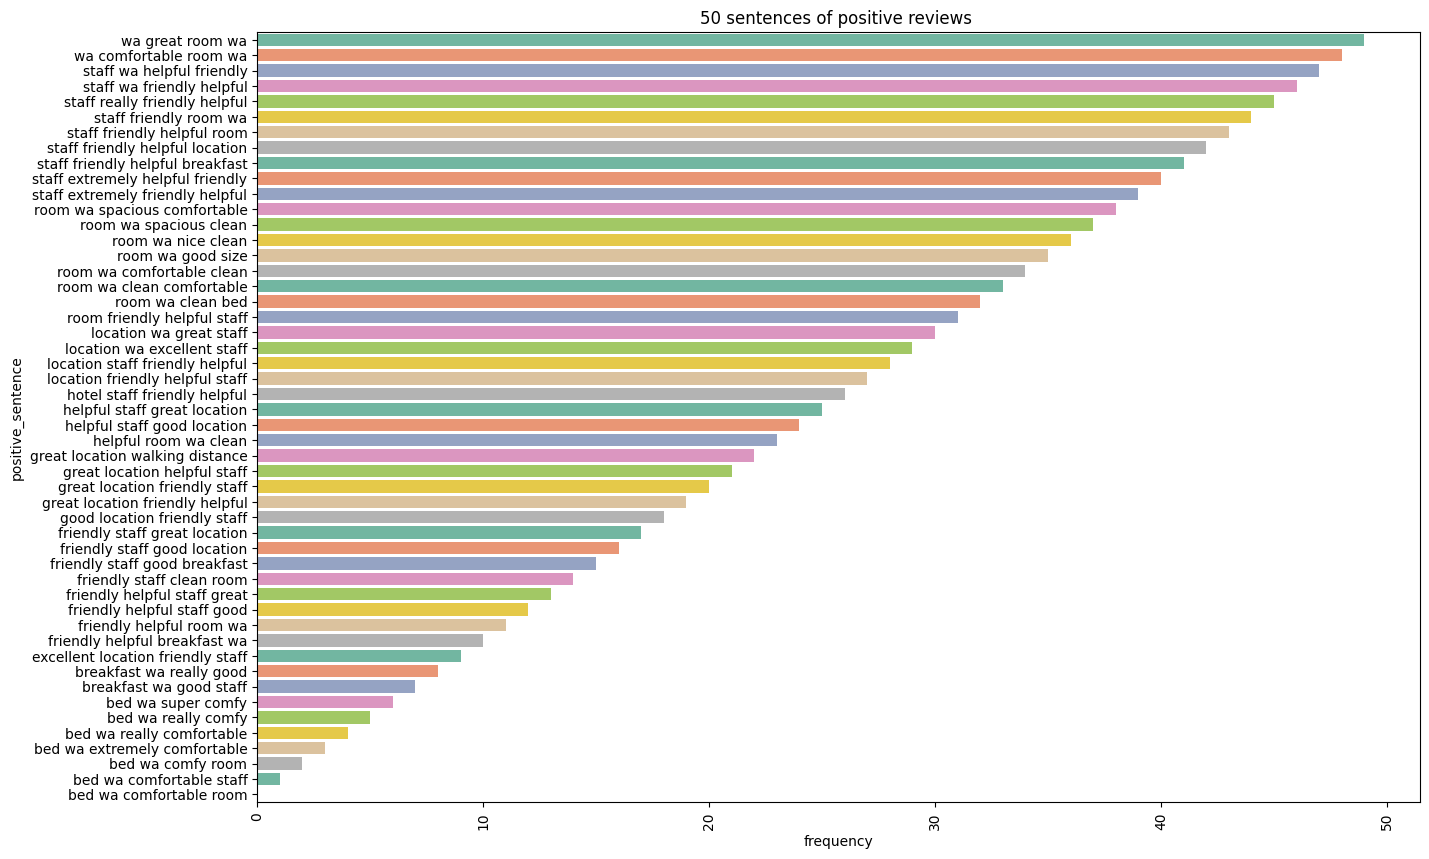

In [59]:
plt.figure(figsize=(15,10))
color_palette = sns.color_palette("Set2")
sns.barplot(x="frequency",y="positive_sentence",data=positive_words.sort_values(by="frequency",ascending=False),palette=color_palette)
plt.title("50 sentences of positive reviews ")
plt.xticks(rotation=90)
plt.show()

### Observations [ from positive_reviews] :

- These are the observations that would help hotels to improve their quality and service.
- These represent the aspects or services that customers found to their liking.

1. The staff's assistance and friendliness were commendable.
2. The rooms were well-maintained and neat.
3. Guests appreciated the comfort of the beds.
4. The hotel's locations were situated in favorable areas.
5. The proximity to the city center was well-received.
6. Many guests were pleased with the quality of the breakfast.